In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lung-cancer-data/lung cancer survey.csv


In [2]:
import pandas as pd
from IPython.display import display

# Загрузка данных из CSV файла
file_path = '/kaggle/input/lung-cancer-data/lung cancer survey.csv'
df = pd.read_csv(file_path)

# Вывод первых пяти строк в красивом формате
display(df.head())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.shape

(309, 16)

In [5]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [6]:
# Убираем лишние пробелы в именах столбцов
df.columns = df.columns.str.strip()

# Список категориальных параметров
categorical_columns = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
]

# Изменяем тип данных на object для категориальных параметров
df[categorical_columns] = df[categorical_columns].astype('object')

# Проверяем результат
print(df.dtypes)


GENDER                   object
AGE                       int64
SMOKING                  object
YELLOW_FINGERS           object
ANXIETY                  object
PEER_PRESSURE            object
CHRONIC DISEASE          object
FATIGUE                  object
ALLERGY                  object
WHEEZING                 object
ALCOHOL CONSUMING        object
COUGHING                 object
SHORTNESS OF BREATH      object
SWALLOWING DIFFICULTY    object
CHEST PAIN               object
LUNG_CANCER              object
dtype: object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0


In [8]:
# Проверка на пустые ячейки
null_values = df.isnull().sum()

# Вывод количества пустых ячеек в каждом столбце
print(null_values)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


# Важность признаков

## ANOVA

In [9]:
# Список категориальных признаков
categorical_features = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
    'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
]

# Список числовых признаков
numeric_features = [
    'AGE'
]

In [10]:
from scipy.stats import f_oneway
import pandas as pd

# Преобразуем категориальные признаки в тип 'category', если необходимо
df[categorical_features] = df[categorical_features].astype('category')

# Преобразуем 'LUNG_CANCER' в числовые значения: 'YES' -> 1, 'NO' -> 0
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# ANOVA для категориальных признаков
print("ANOVA для категориальных признаков:")
for cat_feature in categorical_features:
    # Группируем данные по категориальному признаку и извлекаем значения для переменной 'LUNG_CANCER'
    grouped_data = [group['LUNG_CANCER'].dropna().values for name, group in df.groupby(cat_feature, observed=False)]
    
    # Выполняем ANOVA
    f_stat, p_value = f_oneway(*grouped_data)
    
    # Выводим результаты
    print(f"Признак: {cat_feature}")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")
    print("-" * 40)

# ANOVA для числовых признаков
print("\nANOVA для числовых признаков:")
for num_feature in numeric_features:
    # Разделяем значения числового признака на квантильные группы (например, на 4 группы)
    df['grouped_' + num_feature] = pd.qcut(df[num_feature], q=4, duplicates='drop')
    
    # Группируем данные по созданным квантильным группам
    grouped_data = [group['LUNG_CANCER'].dropna().values for name, group in df.groupby('grouped_' + num_feature, observed=False)]
    
    # Выполняем ANOVA
    f_stat, p_value = f_oneway(*grouped_data)
    
    # Выводим результаты
    print(f"Признак: {num_feature}")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")
    print("-" * 40)


ANOVA для категориальных признаков:
Признак: SMOKING
F-statistic: 1.0427, p-value: 3.0801e-01
----------------------------------------
Признак: YELLOW_FINGERS
F-statistic: 10.4386, p-value: 1.3680e-03
----------------------------------------
Признак: ANXIETY
F-statistic: 6.5884, p-value: 1.0738e-02
----------------------------------------
Признак: PEER_PRESSURE
F-statistic: 11.0491, p-value: 9.9474e-04
----------------------------------------
Признак: CHRONIC DISEASE
F-statistic: 3.8221, p-value: 5.1487e-02
----------------------------------------
Признак: FATIGUE
F-statistic: 7.1315, p-value: 7.9776e-03
----------------------------------------
Признак: ALLERGY
F-statistic: 36.9507, p-value: 3.5895e-09
----------------------------------------
Признак: WHEEZING
F-statistic: 20.3446, p-value: 9.2179e-06
----------------------------------------
Признак: ALCOHOL CONSUMING
F-statistic: 27.8791, p-value: 2.4488e-07
----------------------------------------
Признак: COUGHING
F-statistic: 20.21

## CORRELATION

In [12]:
# Применяем One-Hot Encoding к категориальным признакам
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Рассчитываем средние значения для каждого категориального признака
categorical_influence_means = {}
for cat_feature in categorical_features:
    encoded_features = [col for col in df_encoded.columns if col.startswith(cat_feature)]
    if encoded_features:
        categorical_influence_means[cat_feature] = df_encoded[encoded_features].mean(axis=1)
    else:
        print(f"Категориальный признак '{cat_feature}' не найден в данных.")

# Добавляем средние значения категориальных признаков в основной DataFrame
for cat_feature, mean_values in categorical_influence_means.items():
    df_encoded[f'avg_{cat_feature}'] = mean_values

# Рассчитываем корреляцию числовых признаков с LUNG_CANCER
numeric_correlations = {}
for num_feature in numeric_features:
    numeric_correlations[num_feature] = df_encoded[num_feature].corr(df_encoded['LUNG_CANCER'])

# Рассчитываем корреляцию для категориальных признаков (через One-Hot Encoding)
categorical_correlations = {}
for cat_feature in categorical_features:
    encoded_features = [col for col in df_encoded.columns if col.startswith(cat_feature)]
    if encoded_features:
        cat_corr = df_encoded[encoded_features].corrwith(df_encoded['LUNG_CANCER'])
        categorical_correlations[cat_feature] = cat_corr.mean()

# Выводим результаты для корреляции числовых признаков
print("\nКорреляция числовых признаков с LUNG_CANCER:")
for num_feature, corr in numeric_correlations.items():
    print(f"{num_feature}: {corr:.4f}")

# Выводим результаты для корреляции категориальных признаков с LUNG_CANCER
print("\nКорреляция категориальных признаков с LUNG_CANCER:")
for cat_feature, corr in categorical_correlations.items():
    print(f"{cat_feature}: {corr:.4f}")



Корреляция числовых признаков с LUNG_CANCER:
AGE: 0.0895

Корреляция категориальных признаков с LUNG_CANCER:
SMOKING: 0.0582
YELLOW_FINGERS: 0.1813
ANXIETY: 0.1449
PEER_PRESSURE: 0.1864
CHRONIC DISEASE: 0.1109
FATIGUE: 0.1507
ALLERGY: 0.3278
WHEEZING: 0.2493
ALCOHOL CONSUMING: 0.2885
COUGHING: 0.2486
SHORTNESS OF BREATH: 0.0607
SWALLOWING DIFFICULTY: 0.2597
CHEST PAIN: 0.1905


## PCA

In [17]:
import pandas as pd
from sklearn.decomposition import PCA

# Выбираем только нужные признаки
selected_df = df[categorical_features + numeric_features + ['LUNG_CANCER']]  # Добавляем LUNG_CANCER

# Применяем One-Hot Encoding к категориальным признакам
selected_df = pd.get_dummies(selected_df, columns=categorical_features, drop_first=True)

# Убедимся, что LUNG_CANCER остался после One-Hot Encoding
if 'LUNG_CANCER' not in selected_df.columns:
    selected_df['LUNG_CANCER'] = df['LUNG_CANCER']

# Создаем новые столбцы для средних значений
selected_df['avg_SMOKING'] = selected_df.filter(like='SMOKING_').mean(axis=1)
selected_df['avg_YELLOW_FINGERS'] = selected_df.filter(like='YELLOW_FINGERS_').mean(axis=1)
selected_df['avg_ANXIETY'] = selected_df.filter(like='ANXIETY_').mean(axis=1)
selected_df['avg_PEER_PRESSURE'] = selected_df.filter(like='PEER_PRESSURE_').mean(axis=1)
selected_df['avg_CHRONIC DISEASE'] = selected_df.filter(like='CHRONIC DISEASE_').mean(axis=1)
selected_df['avg_FATIGUE'] = selected_df.filter(like='FATIGUE_').mean(axis=1)
selected_df['avg_ALLERGY'] = selected_df.filter(like='ALLERGY_').mean(axis=1)
selected_df['avg_WHEEZING'] = selected_df.filter(like='WHEEZING_').mean(axis=1)
selected_df['avg_ALCOHOL CONSUMING'] = selected_df.filter(like='ALCOHOL CONSUMING_').mean(axis=1)
selected_df['avg_COUGHING'] = selected_df.filter(like='COUGHING_').mean(axis=1)
selected_df['avg_SHORTNESS OF BREATH'] = selected_df.filter(like='SHORTNESS OF BREATH_').mean(axis=1)
selected_df['avg_SWALLOWING DIFFICULTY'] = selected_df.filter(like='SWALLOWING DIFFICULTY_').mean(axis=1)
selected_df['avg_CHEST PAIN'] = selected_df.filter(like='CHEST PAIN_').mean(axis=1)

# Выбираем только интересующие признаки, включая средние значения
selected_features = ['LUNG_CANCER', 'AGE', 'avg_SMOKING', 'avg_YELLOW_FINGERS', 'avg_ANXIETY', 
                     'avg_PEER_PRESSURE', 'avg_CHRONIC DISEASE', 'avg_FATIGUE', 'avg_ALLERGY',
                    'avg_WHEEZING', 'avg_ALCOHOL CONSUMING', 'avg_COUGHING','avg_SHORTNESS OF BREATH',
                    'avg_SWALLOWING DIFFICULTY', 'avg_CHEST PAIN']
selected_df = selected_df[selected_features]

# Отделяем целевую переменную
X = selected_df.drop('LUNG_CANCER', axis=1)
y = selected_df['LUNG_CANCER']

# Рассчитываем средние значения признаков до применения PCA
numeric_means = selected_df.drop('LUNG_CANCER', axis=1).mean()

# Применяем PCA для сокращения размерности
pca = PCA(n_components=6)  # Указываем желаемое количество компонент
X_pca = pca.fit_transform(X)

# Рассчитываем средние значения влияния категориальных признаков на score_anime после применения PCA
categorical_influence_means = pd.DataFrame({'Feature': X.columns, 'Importance_PCA': pca.components_.mean(axis=0)})

# Добавляем средние значения признаков до применения PCA
categorical_influence_means['Average_Pre_PCA'] = [numeric_means[feature] for feature in categorical_influence_means['Feature']]

# Выведем результаты
print("Средние значения влияния категориальных признаков на LUNG_CANCER после применения PCA:")
print(categorical_influence_means.sort_values(by='Importance_PCA', ascending=False))
print("Средние значения признаков до применения PCA:")
print(numeric_means)


Средние значения влияния категориальных признаков на LUNG_CANCER после применения PCA:
                      Feature  Importance_PCA  Average_Pre_PCA
9       avg_ALCOHOL CONSUMING        0.157821         0.556634
8                avg_WHEEZING        0.054650         0.556634
7                 avg_ALLERGY        0.042353         0.556634
5         avg_CHRONIC DISEASE        0.017428         0.504854
10               avg_COUGHING        0.011227         0.579288
13             avg_CHEST PAIN       -0.026809         0.556634
4           avg_PEER_PRESSURE       -0.060882         0.501618
12  avg_SWALLOWING DIFFICULTY       -0.079042         0.469256
2          avg_YELLOW_FINGERS       -0.104254         0.569579
3                 avg_ANXIETY       -0.116994         0.498382
6                 avg_FATIGUE       -0.146593         0.673139
1                 avg_SMOKING       -0.147639         0.563107
0                         AGE       -0.167989        62.673139
11    avg_SHORTNESS OF BREATH  

## XGBoost

In [18]:
import xgboost as xgb

# Создаем модель XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Получаем важности признаков
feature_importances_xgb = xgb_model.feature_importances_

# Создаем DataFrame с важностью признаков
feature_importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance_XGB': feature_importances_xgb})

# Сортируем признаки по важности
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance_XGB', ascending=False)

# Выводим результаты
print("Важность признаков на основе XGBoost:")
print(feature_importance_df_xgb)

Важность признаков на основе XGBoost:
                      Feature  Importance_XGB
12  avg_SWALLOWING DIFFICULTY        0.258316
7                 avg_ALLERGY        0.112891
9       avg_ALCOHOL CONSUMING        0.103085
8                avg_WHEEZING        0.080084
5         avg_CHRONIC DISEASE        0.073180
6                 avg_FATIGUE        0.067566
11    avg_SHORTNESS OF BREATH        0.056900
2          avg_YELLOW_FINGERS        0.053938
3                 avg_ANXIETY        0.049453
4           avg_PEER_PRESSURE        0.045196
10               avg_COUGHING        0.039184
0                         AGE        0.031897
1                 avg_SMOKING        0.019639
13             avg_CHEST PAIN        0.008671


## Random Forest

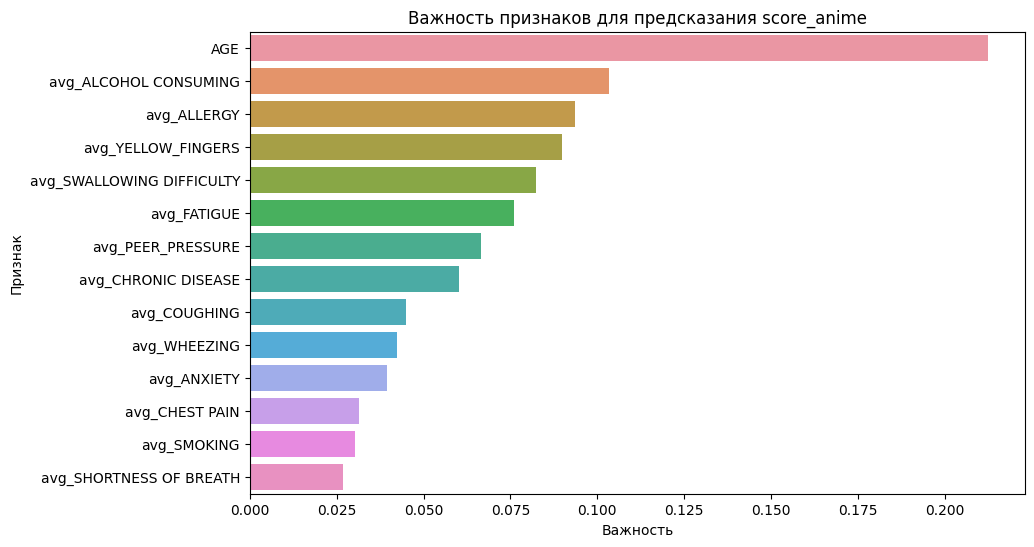

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Обучаем модель на обучающих данных
rf_model.fit(X_train, y_train)

# Оцениваем важность признаков
feature_importances = rf_model.feature_importances_

# Создаем DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем признаки по важности в убывающем порядке
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Важность признаков для предсказания score_anime')
plt.show()

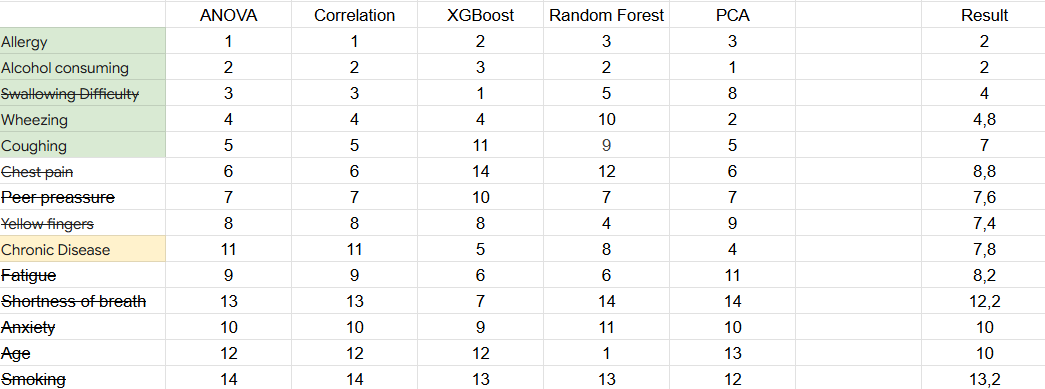
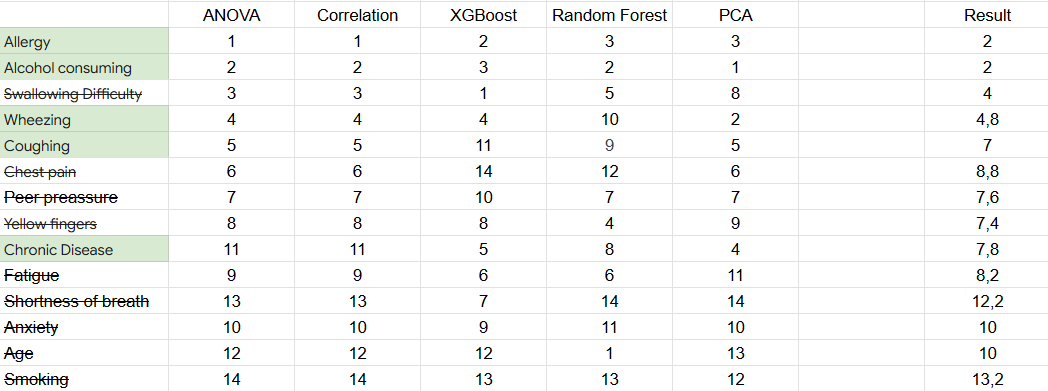